In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [2]:
df = pd.read_csv("API_19_DS2_en_csv_v2_6183479.csv", skiprows=4)
df.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Unnamed: 67
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.776,50.761000,50.746000,50.730000,50.715000,50.700000,...,43.041000,43.108000,43.192000,43.293000,43.411000,43.546000,43.697000,43.866000,44.052000,NaN
1,Aruba,ABW,Urban population,SP.URB.TOTL,27728.000,28330.000000,28764.000000,29157.000000,29505.000000,29802.000000,...,44588.000000,44943.000000,45297.000000,45648.000000,45999.000000,46351.000000,46574.000000,46734.000000,46891.000000,NaN
2,Aruba,ABW,Urban population growth (annual %),SP.URB.GROW,NaN,2.147858,1.520329,1.357042,1.186472,1.001576,...,0.810669,0.793026,0.784578,0.771899,0.765986,0.762321,0.479958,0.342951,0.335381,NaN
3,Aruba,ABW,"Population, total",SP.POP.TOTL,54608.000,55811.000000,56682.000000,57475.000000,58178.000000,58782.000000,...,103594.000000,104257.000000,104874.000000,105439.000000,105962.000000,106442.000000,106585.000000,106537.000000,106445.000000,NaN
4,Aruba,ABW,Population growth (annual %),SP.POP.GROW,NaN,2.179059,1.548572,1.389337,1.215721,1.032841,...,0.691615,0.637959,0.590062,0.537296,0.494795,0.451970,0.134255,-0.045045,-0.086392,NaN


In [3]:
# droping the last unnamed column
df = df.drop(df.columns[-1], axis=1)

In [4]:
# converting all the year columns to a single column "Year"
df = pd.melt(df, id_vars=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],
                    var_name='Year', value_name='Value')

# convertign the year to int
df['Year'] = df['Year'].astype("int")

I will select following **indicators** for the analysis : `Population, total`, `Urban population (% of total population)`, `Total greenhouse gas emissions (% change from 1990)`, `Total greenhouse gas emissions (kt of CO2 equivalent)`,`Energy use (kg of oil equivalent per capita)` ,`Electric power consumption`, `Renewable energy consumption (% of total final energy consumption)`, `Access to electricity (% of population)`,`Foreign direct investment, net inflows (% of GDP)`, `Agricultural land (% of land area)`, `Forest area (% of land area)`

And I will analyse following **contries** : United States, Australia, India, China, Russian Federation, Germany, South Africa, United Kingdom, Brazil, France, Japan, Switzerland

In [5]:
df['Indicator Name'].unique()

array(['Urban population (% of total population)', 'Urban population',
       'Urban population growth (annual %)', 'Population, total',
       'Population growth (annual %)',
       'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)',
       'Prevalence of underweight, weight for age (% of children under 5)',
       'Community health workers (per 1,000 people)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Primary completion rate, total (% of relevant age group)',
       'School enrollment, primary and secondary (gross), gender parity index (GPI)',
       'Agriculture, forestry, and fishing, value added (% of GDP)',
       'CPIA public sector management and institutions cluster average (1=low to 6=high)',
       'Ease of doing business rank (1=most business-friendly regulations)',
       'Terrestrial and marine protected areas (% of total territorial area)',
       'Marine protected areas (% of territorial waters)',
       'Terrestrial protected 

In [6]:
country_list = ["United States", "Australia", "India", "China",
                "Russian Federation", "Germany", "South Africa",
                "United Kingdom", "Brazil", "France", "Japan", "Switzerland"]

indicator_list = ["Population, total",
                  "Urban population (% of total population)",
                  "Total greenhouse gas emissions (% change from 1990)",
                  "Total greenhouse gas emissions (kt of CO2 equivalent)",
                  "Energy use (kg of oil equivalent per capita)",
                  "Electric power consumption (kWh per capita)",
                  "Renewable energy consumption (% of total final energy consumption)",
                  "Foreign direct investment, net inflows (% of GDP)",
                  "Agricultural land (% of land area)",
                  "Arable land (% of land area)",
                  "Forest area (% of land area)"]

# filtering the dataframe based on the selected countries and indicators
df = df[df["Country Name"].isin(country_list)]
df = df[df["Indicator Name"].isin(indicator_list)]

In [8]:
# as Country Code and Indicator code as alias I will remove them
df = df.drop(columns=['Country Code', 'Indicator Code'])

Following is the data observations form the indicators:

> Population, total : All data is present

> Urban population (% of total population) : All data is present

> Total greenhouse gas emissions (% change from 1990) : Data present from 1991 to 2012 (except for South Africa for which it is present till 2007)

> Total greenhouse gas emissions (kt of CO2 equivalent) : Data present from 1990 to 2020

> Energy use (kg of oil equivalent per capita) : Data present from 1971 to 2014 (except for Russia for which it is present from 1990)

> Electric power consumption : Data present from 1971 to 2014 (except for Russia for which it is present from 1990) :  Data present from 1990 to 2020

> Renewable energy consumption (% of total final energy consumption) : Data present from 1990 to 2020

> Access to electricity (% of population) : Data present from 1990 to 2021 but missing for some countries. It is available for all the countries from 2000 onwards.

> Foreign direct investment, net inflows (% of GDP) : Avaliable from 1970 but present for all the countries from 1983 to 2022.

> Agricultural land (% of land area) : Data present from 1961 to 2021

> Forest area (% of land area) : Data present from 1990 to 2021


For many of the indicators, the data is present from 1990 onwards, so I will use the data from 1990 to 2022

In [9]:
# Filtering for the years
df = df[df['Year']>=1990]

In [10]:
# data info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4356 entries, 607468 to 1273454
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    4356 non-null   object 
 1   Indicator Name  4356 non-null   object 
 2   Year            4356 non-null   int32  
 3   Value           3942 non-null   float64
dtypes: float64(1), int32(1), object(2)
memory usage: 153.1+ KB


In [11]:
# missing values
df.isna().sum()

Country Name        0
Indicator Name      0
Year                0
Value             414
dtype: int64

I won't fill the missing values as no data is availbel for that field

In [12]:
# creating the data fromes for years and countries
# "df" is the dataframe for the years
# creating 2nd dataframe for countries as column

df_countries = df.pivot(index=['Year', 'Indicator Name'], columns='Country Name', values='Value')
df_countries = df_countries.reset_index()

### Data Analysis

In [13]:
# some statistical analysis
# Pivot the DataFrame to have separate columns for Population and Emissions
# The data is available till 2020, so I will filter till this year
df_pivot = df.pivot_table(index=['Country Name', 'Year'], columns='Indicator Name', values='Value').reset_index()
df_pivot = df_pivot[df_pivot['Year']<=2020]


df_pivot.head()

Indicator Name,Country Name,Year,Agricultural land (% of land area),Arable land (% of land area),Electric power consumption (kWh per capita),Energy use (kg of oil equivalent per capita),"Foreign direct investment, net inflows (% of GDP)",Forest area (% of land area),"Population, total",Renewable energy consumption (% of total final energy consumption),Total greenhouse gas emissions (% change from 1990),Total greenhouse gas emissions (kt of CO2 equivalent),Urban population (% of total population)
0,Australia,1990,60.455463,2.207152,8527.214094,5061.500154,2.715782,17.427359,17065128.0,8.01,NaN,490531.2507,85.433
1,Australia,1991,60.240032,2.239954,8522.141472,4927.771326,0.801293,17.400439,17284036.0,8.25,3.534839,491238.7818,85.403
2,Australia,1992,60.659438,2.112128,8558.334218,4963.858162,1.518100,17.373518,17478635.0,7.52,0.973199,492143.4511,85.285
3,Australia,1993,59.890528,2.227328,8717.645239,5156.933379,1.701950,17.346598,17634808.0,8.62,-0.587711,494326.0775,85.157
4,Australia,1994,61.068040,2.322612,8837.004453,5103.947956,1.381151,17.319678,17805468.0,8.26,8.320842,500142.7164,85.028


In [14]:
# analysing the population
df_pivot.groupby("Year").sum(["Population, total"])["Population, total"].describe()

count    3.100000e+01
mean     3.474688e+09
std      3.008170e+08
min      2.935798e+09
25%      3.237668e+09
50%      3.494655e+09
75%      3.723000e+09
max      3.933438e+09
Name: Population, total, dtype: float64

#### 1. Population and Greenhouse emission

In [15]:
# The emission values are very huge and difficult to distinguish,
# so I will create a new column to compare with the maximum
# emission of that country


# comaparing with the maximum of the respective country
df_pivot['Greenhouse emission, wrt 1990'] = df_pivot.groupby('Country Name')['Total greenhouse gas emissions (kt of CO2 equivalent)'].transform(lambda x: x - x[df_pivot['Year'] == 1990].values[0])

# population wrt 1990 for easy understanding
df_pivot['Population, wrt 1990'] = df_pivot.groupby('Country Name')['Population, total'].transform(lambda x: x - x[df_pivot['Year'] == 1990].values[0])

# convertign poplulation to million
df_pivot['Population, wrt 1990'] = df_pivot['Population, wrt 1990']/1e6

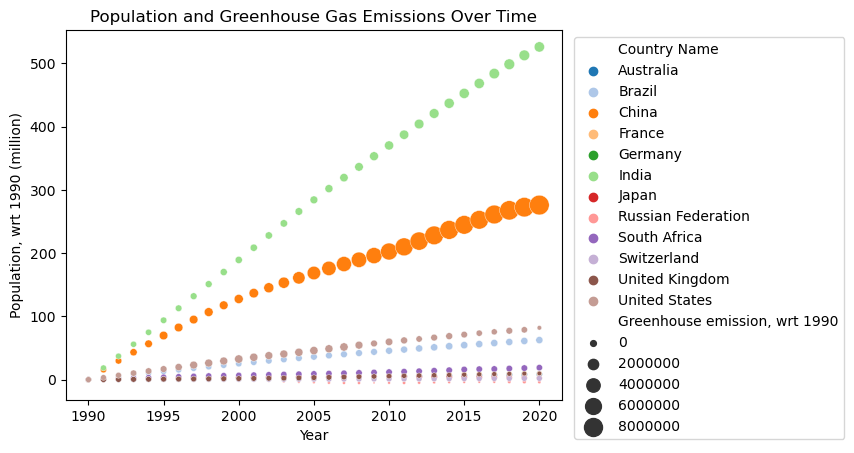

In [16]:
# plt.figure(figsize=(12, 8))
sns.scatterplot(x='Year', y='Population, wrt 1990', data=df_pivot,
                size="Greenhouse emission, wrt 1990", hue="Country Name",
                markers=True, legend="auto", sizes=(0, 200), palette="tab20")

# setting the labels and title
plt.xlabel('Year')
plt.ylabel('Population, wrt 1990 (million)')
plt.title('Population and Greenhouse Gas Emissions Over Time')

# moving the legend outside the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.savefig("Population and Greenhouse emission.png", bbox_inches='tight')
plt.show()

The population growth of India is higest while the growth Greenhouse emission for China is highest in China.

#### 2. Power usages and Green house gas

The logical that, if the amount of Renewable energy consumption increase, the Greenhouse will reduce.

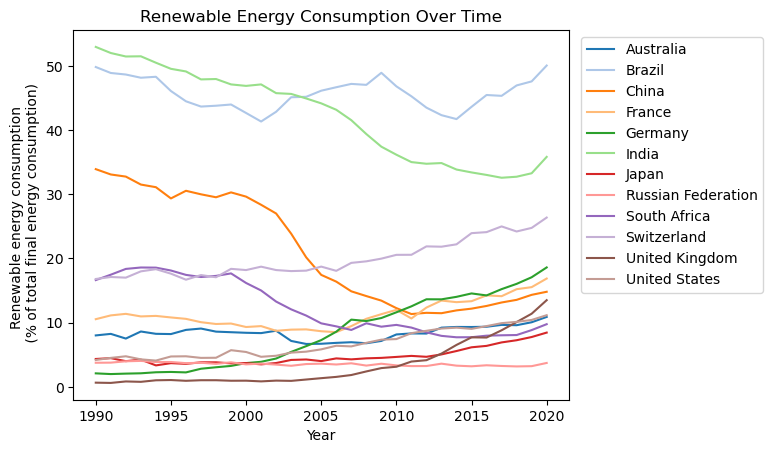

In [17]:
# plt.figure(figsize=(12, 8))
sns.lineplot(x='Year', y='Renewable energy consumption (% of total final energy consumption)',
             data=df_pivot, hue="Country Name", markers=True, palette="tab20")

# setting the labels and title
plt.xlabel('Year')
plt.ylabel('Renewable energy consumption \n (% of total final energy consumption)')
plt.title('Renewable Energy Consumption Over Time')

# moving the legend outside the plot
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')

plt.savefig("Renewable Energy Consumption Over Time.png", bbox_inches='tight')
plt.show()

#### 3. Urban population, Agricultural and Forest

In [19]:
# analysing India's urban population, agriculture and forest
df_India = df_pivot[df_pivot['Country Name']=="India"]

columns_to_keep = ["Year",
                   'Urban population (% of total population)', 
                   'Agricultural land (% of land area)',
                   'Forest area (% of land area)']

df_India_agri = df_India[columns_to_keep]
df_India_agri = df_India_agri.set_index("Year")
df_India_agri.head()

Indicator Name,Urban population (% of total population),Agricultural land (% of land area),Forest area (% of land area)
Year,,,
1990,25.547,61.016282,21.504848
1991,25.778,61.074469,21.627713
1992,25.984,60.979958,21.750578
1993,26.191,61.005856,21.873442
1994,26.399,60.975249,21.996307


In [20]:
# understsnding the correlation
df_India_agri.corr()

Indicator Name,Urban population (% of total population),Agricultural land (% of land area),Forest area (% of land area)
Indicator Name,,,
Urban population (% of total population),1.000000,-0.958543,0.977073
Agricultural land (% of land area),-0.958543,1.000000,-0.958812
Forest area (% of land area),0.977073,-0.958812,1.000000


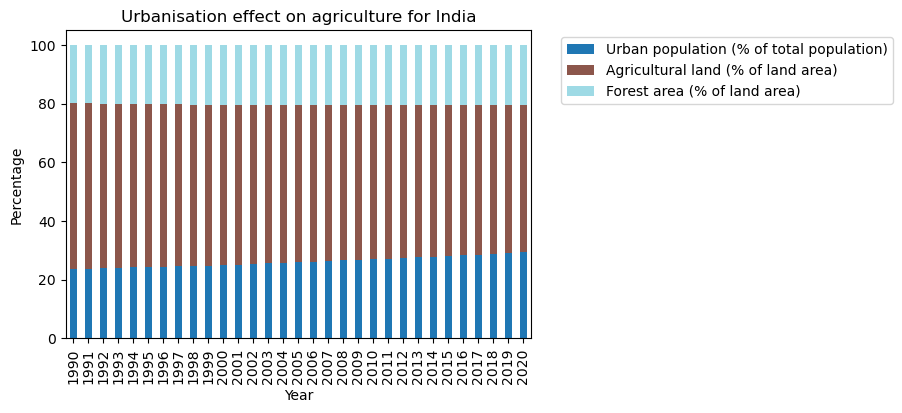

In [22]:
# calculating the percentage for each indicator for plotting
df_percentage = df_India_agri.div(df_India_agri.sum(axis=1), axis=0) * 100

# plotting the stacked bar chart
ax = df_percentage.plot(kind='bar', stacked=True, figsize=(6, 4), colormap='tab20')

# setting labels and title
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.title('Urbanisation effect on agriculture for India')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.savefig("Urban Population, Agriculture and Forest Area.png", bbox_inches='tight')
# Show the plot
plt.show()

#### 4. Areable land comparison

In [23]:
df_areable = df_pivot[["Country Name",
                   "Year",
                   "Arable land (% of land area)"]]

# analysing the areable land and greenhouse gas emission for IND and USA
df_areable = df_areable[df_areable["Country Name"].isin(['India', 'United States'])]

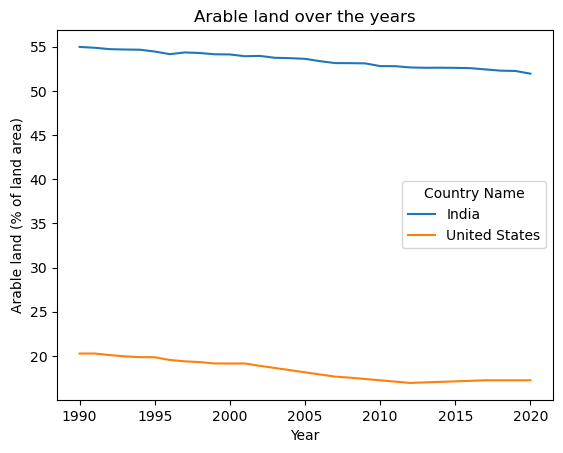

In [24]:
sns.lineplot(x="Year", y="Arable land (% of land area)", data=df_areable, hue="Country Name")

# setting labels and title
plt.xlabel('Year')
plt.ylabel('Arable land (% of land area)')
plt.title('Arable land over the years')

plt.savefig("Arable land over the years.png", bbox_inches='tight')
# Show the plot
plt.show()

#### 5. Contribution to Greenhouse gas emission

C:\Users\prath\AppData\Local\Temp\ipykernel_41556\4042978134.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_year['Emissions per Person'] = df_selected_year['Total greenhouse gas emissions (kt of CO2 equivalent)'] / df_selected_year['Population, total']


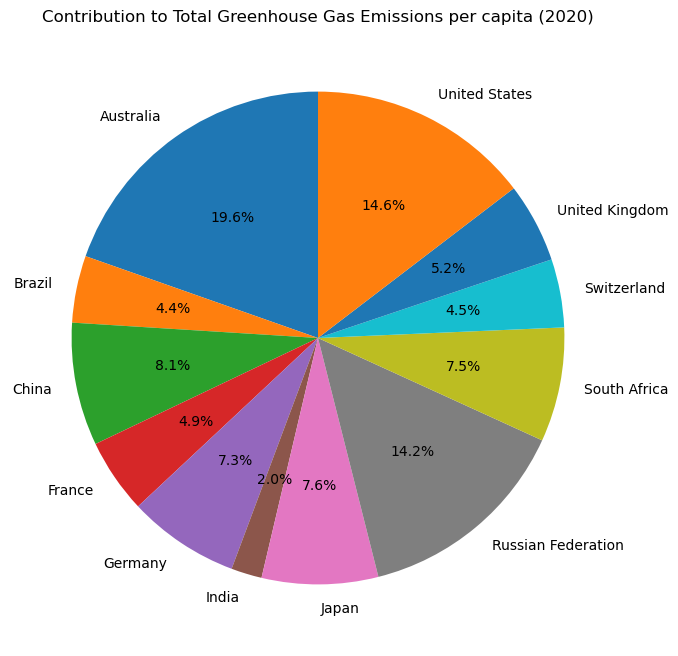

In [25]:
# greenhouse gas emmited per capita for year 2020
selected_year = 2020

# filtering data for the selected year
df_selected_year = df_pivot[df_pivot['Year'] == selected_year]

# Calculate emissions per person
df_selected_year['Emissions per Person'] = df_selected_year['Total greenhouse gas emissions (kt of CO2 equivalent)'] / df_selected_year['Population, total']

colors = sns.color_palette('tab10', n_colors=len(df_selected_year))
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(df_selected_year['Emissions per Person'], labels=df_selected_year['Country Name'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Contribution to Total Greenhouse Gas Emissions per capita ({selected_year})')
plt.savefig("Greenhouse gas contribution2020.png", bbox_inches='tight')
# Show the pie chart
plt.show()

C:\Users\prath\AppData\Local\Temp\ipykernel_41556\3438650705.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected_year['Emissions per Person'] = df_selected_year['Total greenhouse gas emissions (kt of CO2 equivalent)'] / df_selected_year['Population, total']


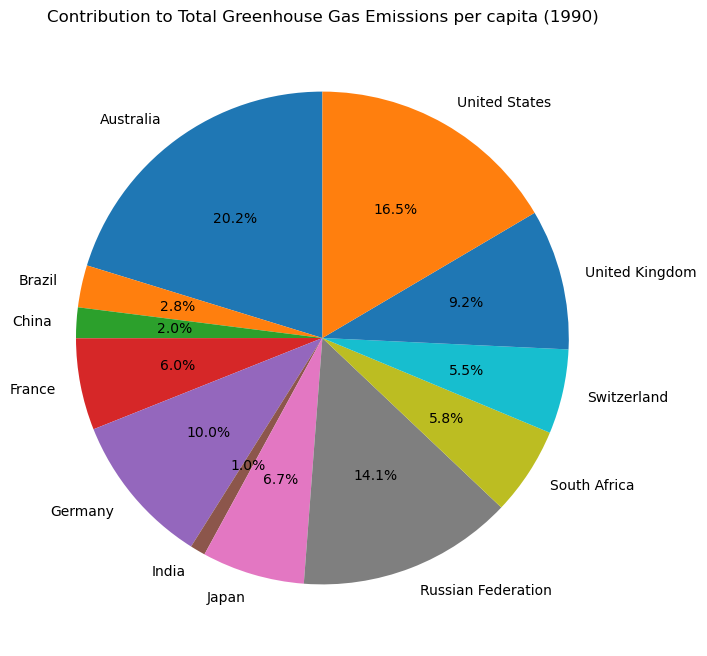

In [26]:
# greenhouse gas emmited per capita for year 1990
selected_year = 1990

# Filter data for the selected year
df_selected_year = df_pivot[df_pivot['Year'] == selected_year]

# Calculate emissions per person
df_selected_year['Emissions per Person'] = df_selected_year['Total greenhouse gas emissions (kt of CO2 equivalent)'] / df_selected_year['Population, total']

colors = sns.color_palette('tab10', n_colors=len(df_selected_year))
# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(df_selected_year['Emissions per Person'], labels=df_selected_year['Country Name'], autopct='%1.1f%%', startangle=90, colors=colors)
plt.title(f'Contribution to Total Greenhouse Gas Emissions per capita ({selected_year})')
plt.savefig("Greenhouse gas contribution1990.png", bbox_inches='tight')
# Show the pie chart
plt.show()

#### 6. Correlation of the Indicators

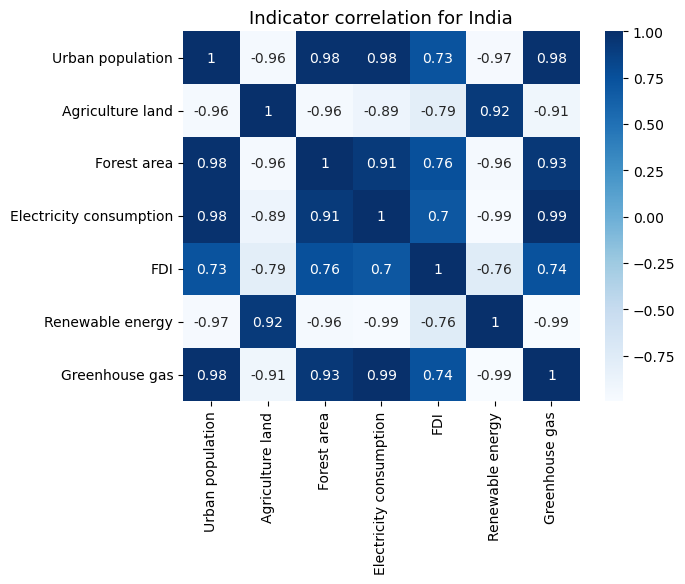

In [34]:
# I will only consider those columns whose correlation
# is not that direct

correlation_columns = ['Urban population (% of total population)',
                       'Agricultural land (% of land area)',
                       'Forest area (% of land area)',
                       'Electric power consumption (kWh per capita)',
                       'Foreign direct investment, net inflows (% of GDP)',
                       'Renewable energy consumption (% of total final energy consumption)',
                       'Total greenhouse gas emissions (% change from 1990)']

# alias names for the columns
alias_names = ["Urban population", "Agriculture land", "Forest area",
               "Electricity consumption", "FDI", "Renewable energy",
              "Greenhouse gas"]

# correlation for India
df_India_corr = df_pivot[df_pivot['Country Name']=="India"]
df_India_corr = df_India_corr[correlation_columns]
df_India_corr.columns = alias_names

sns.heatmap(df_India_corr.corr(), cmap="Blues", annot=True)
plt.title('Indicator correlation for India', fontsize=13)
plt.savefig("Indicator correlation for India.png", bbox_inches='tight')
plt.show()

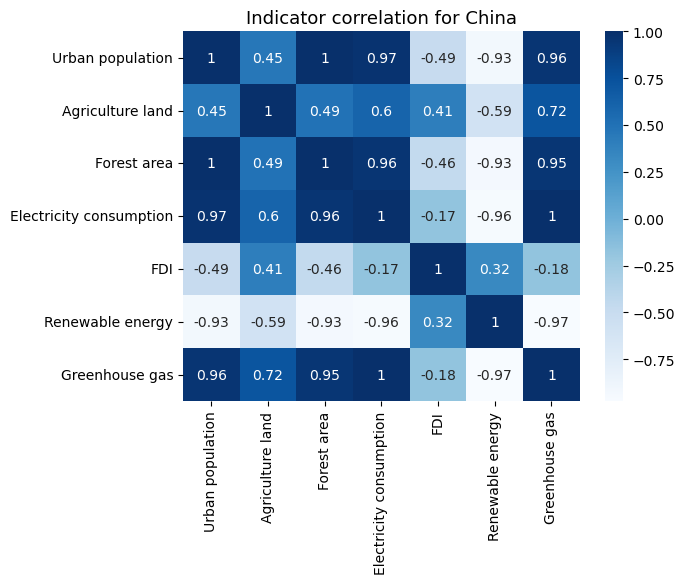

In [39]:
# correlation for China
df_China_corr = df_pivot[df_pivot['Country Name']=="China"]
df_China_corr = df_China_corr[correlation_columns]
df_China_corr.columns = alias_names

sns.heatmap(df_China_corr.corr(), cmap="Blues", annot=True)
plt.title('Indicator correlation for China', fontsize=13)
plt.savefig("Indicator correlation for China.png", bbox_inches='tight')
plt.show()